In [1]:
!pip install kaggle


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:23<00:00, 50.0MB/s]
100% 812M/812M [00:23<00:00, 35.7MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
 zip.extractall()
print('is ready')

is ready


In [7]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
 zip.extractall()
print('is ready')

is ready


In [8]:
import os
path,dirs,files = next(os.walk('/content/train'))
file_count=len(files)
print('no. of images', file_count)

no. of images 25000


In [9]:
file_name= os.listdir('/content/train')
print(file_name)

['dog.9649.jpg', 'cat.9055.jpg', 'dog.8468.jpg', 'cat.2357.jpg', 'dog.2924.jpg', 'dog.8471.jpg', 'dog.1971.jpg', 'cat.3929.jpg', 'cat.11410.jpg', 'cat.7717.jpg', 'cat.5050.jpg', 'cat.8254.jpg', 'dog.8625.jpg', 'dog.6890.jpg', 'dog.1229.jpg', 'cat.11359.jpg', 'cat.11408.jpg', 'dog.10644.jpg', 'cat.8976.jpg', 'cat.3474.jpg', 'dog.3847.jpg', 'dog.11023.jpg', 'dog.1409.jpg', 'cat.12223.jpg', 'dog.10276.jpg', 'cat.6611.jpg', 'dog.5804.jpg', 'dog.11059.jpg', 'dog.11991.jpg', 'dog.8248.jpg', 'dog.3309.jpg', 'dog.1730.jpg', 'cat.6997.jpg', 'dog.1445.jpg', 'cat.6299.jpg', 'cat.11867.jpg', 'cat.4575.jpg', 'dog.11392.jpg', 'dog.6574.jpg', 'cat.5061.jpg', 'cat.2881.jpg', 'dog.10700.jpg', 'dog.3071.jpg', 'cat.11004.jpg', 'dog.9425.jpg', 'dog.903.jpg', 'dog.10470.jpg', 'cat.12070.jpg', 'dog.8816.jpg', 'cat.2554.jpg', 'cat.9940.jpg', 'dog.6572.jpg', 'dog.3928.jpg', 'cat.2551.jpg', 'dog.11729.jpg', 'cat.4000.jpg', 'dog.3843.jpg', 'cat.9220.jpg', 'cat.7388.jpg', 'dog.2185.jpg', 'cat.12225.jpg', 'dog.89

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

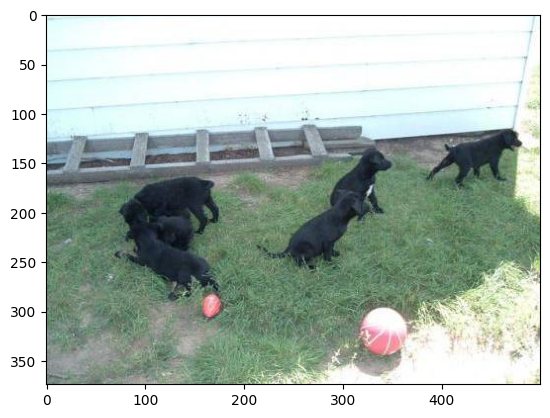

In [11]:
img = mpimg.imread('/content/train/dog.5315.jpg')
imgplt = plt.imshow(img)
plt.show()

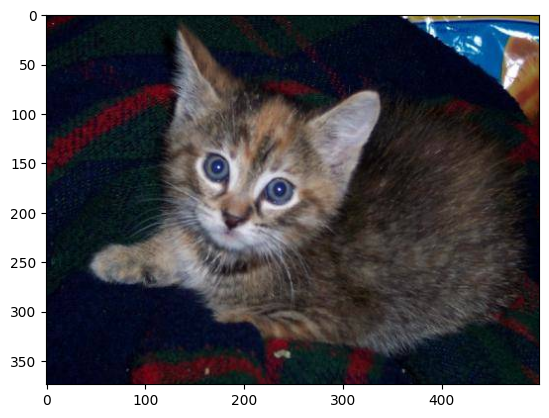

In [12]:
img = mpimg.imread('/content/train/cat.3929.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
os.mkdir('/content/image resized')


In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)


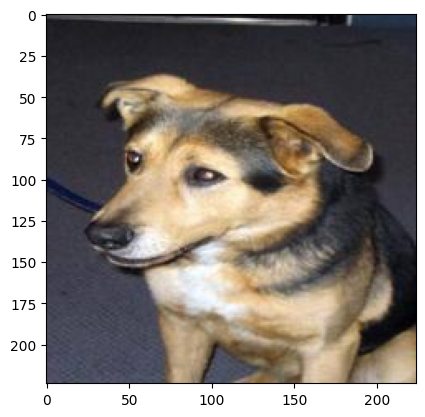

In [15]:
img = mpimg.imread('/content/image resized/dog.10116.jpg')
imgplt = plt.imshow(img)
plt.show()

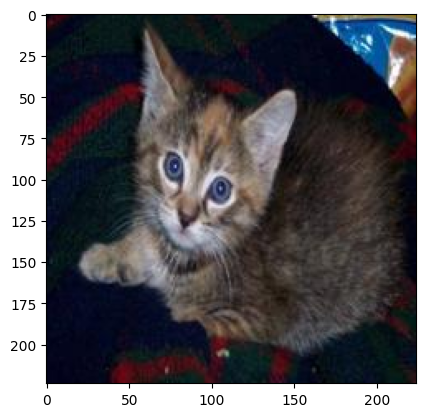

In [16]:
img = mpimg.imread('/content/image resized/cat.3929.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [18]:
print(filenames[0:5])
print(len(filenames))

['dog.9649.jpg', 'cat.9055.jpg', 'dog.8468.jpg', 'cat.2357.jpg', 'dog.2924.jpg']
2000


In [19]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [20]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 990 1010]


In [21]:
import cv2
import glob

In [22]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dog_cat_images)

[[[[ 84  97  95]
   [ 93 106 104]
   [ 96 109 107]
   ...
   [  9  11  12]
   [ 24  26  27]
   [ 49  51  52]]

  [[ 78  91  89]
   [ 84  97  95]
   [ 90 103 101]
   ...
   [ 12  14  15]
   [ 21  23  24]
   [ 42  44  45]]

  [[ 77  87  87]
   [ 78  88  88]
   [ 82  94  94]
   ...
   [ 16  18  19]
   [ 20  22  23]
   [ 33  35  36]]

  ...

  [[245 246 242]
   [249 250 246]
   [248 252 247]
   ...
   [213 243 254]
   [212 238 255]
   [209 234 254]]

  [[245 246 242]
   [246 247 243]
   [249 250 246]
   ...
   [213 245 244]
   [212 242 243]
   [209 239 240]]

  [[248 249 245]
   [241 242 238]
   [241 242 238]
   ...
   [208 243 233]
   [209 242 235]
   [206 239 232]]]


 [[[ 79 105 119]
   [ 79 105 119]
   [ 79 105 119]
   ...
   [ 20  32  44]
   [ 19  31  43]
   [ 19  31  43]]

  [[ 79 105 119]
   [ 79 105 119]
   [ 79 105 119]
   ...
   [ 20  32  44]
   [ 19  31  43]
   [ 19  31  43]]

  [[ 79 105 119]
   [ 79 105 119]
   [ 79 105 119]
   ...
   [ 20  32  44]
   [ 19  31  43]
   [ 19  31

In [24]:
type(dog_cat_images)

numpy.ndarray

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [26]:
X = dog_cat_images
Y = np.asarray(labels)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [29]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

print(X_train_scaled)


[[[[0.70196078 0.68235294 0.67058824]
   [0.70588235 0.68627451 0.6745098 ]
   [0.70980392 0.69019608 0.67843137]
   ...
   [0.56078431 0.50196078 0.42745098]
   [0.59215686 0.53333333 0.45882353]
   [0.61960784 0.56078431 0.48627451]]

  [[0.70588235 0.68627451 0.6745098 ]
   [0.70588235 0.68627451 0.6745098 ]
   [0.70980392 0.69019608 0.67843137]
   ...
   [0.54117647 0.48235294 0.40784314]
   [0.56470588 0.50588235 0.43137255]
   [0.58431373 0.5254902  0.45098039]]

  [[0.70980392 0.69019608 0.67843137]
   [0.70980392 0.69019608 0.67843137]
   [0.71372549 0.69411765 0.68235294]
   ...
   [0.50588235 0.44705882 0.37254902]
   [0.52156863 0.4627451  0.38823529]
   [0.5372549  0.47843137 0.40392157]]

  ...

  [[0.01960784 0.04705882 0.08235294]
   [0.01960784 0.04705882 0.08235294]
   [0.00784314 0.03529412 0.07058824]
   ...
   [0.43921569 0.47058824 0.47058824]
   [0.38431373 0.41568627 0.41568627]
   [0.33333333 0.36470588 0.36470588]]

  [[0.05882353 0.08627451 0.12156863]
   [0.0

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [32]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [33]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [34]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 70s 1s/step - loss: 0.2156 - acc: 0.9094
Epoch 2/5
50/50 [==============================] - 68s 1s/step - loss: 0.0660 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 72s 1s/step - loss: 0.0463 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.0344 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0281 - acc: 0.9944


In [35]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0567 - acc: 0.9800
Test Loss = 0.056656159460544586
Test Accuracy = 0.9800000190734863


**prediction** **model**

Path of the image to be predicted: /content/dog.jpg


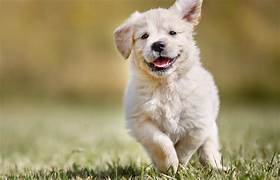

1/1 [==============================] - 1s 604ms/step
[[-3.4684117  4.719054 ]]
1
The image represents a Dog


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


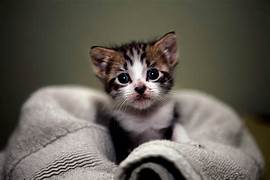

1/1 [==============================] - 0s 60ms/step
[[ 5.326234 -3.176882]]
0
The image represents a Cat


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')